In [1]:
# Daten einlesen - wir arbeiten nochmals mit dem Standard-Datensatz Iris von Scikit-Learn
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)

X = iris.data[["petal length (cm)", "petal width (cm)"]].values # dieses Mal werden zwei Features genommen!
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [3]:
# Nur 1x durchführen
!pip install ISLP

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 27.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 34.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 37.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 891.4/891.4 kB 41.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.5/94.5 kB 8.3 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4031 sha256=53239a76974703549a5c5a2f5a18740cb724f57a2faf0341d321f8bd7e9eaa4a
  Stored in directory: /root/.cache/pip/wheels/25/cc/e0/ef2969164144c899fedb22b338f6703e2b9cf46eeebf254991
Successfully built autograd-gamma
  Attempting un

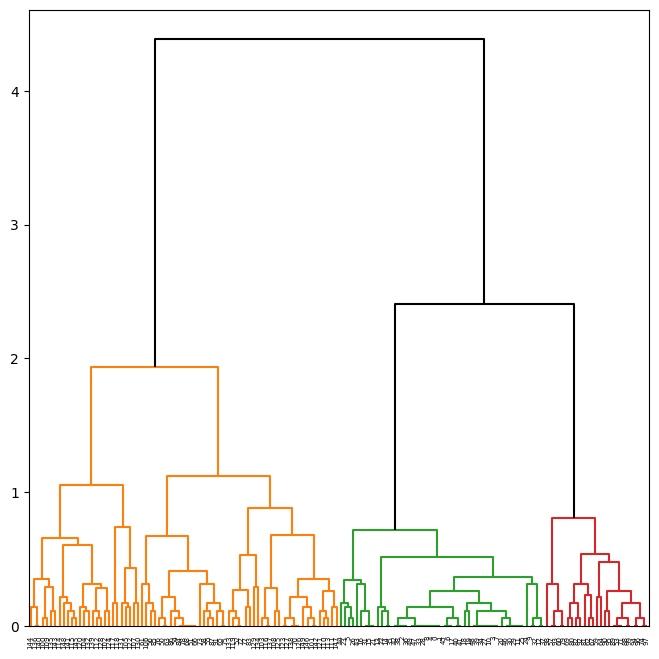

In [6]:
# hierarchisches Clustering Modell trainieren (ohne zu "Schneiden") und Dendrogram visualisieren
from sklearn.cluster import AgglomerativeClustering
import numpy as np
from ISLP.cluster import compute_linkage
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt

HClust = AgglomerativeClustering(n_clusters=None, distance_threshold=0, linkage='complete')
HClust.fit(X)

# mit dem "color_threshold" können unterschiedliche "Schnitthöhen" definiert und visualisiert werden
cargs = {'color_threshold': 2, 'above_threshold_color':'black'}
linkage_comp = compute_linkage(HClust)
fig, ax = plt.subplots(1,1,figsize=(8,8))
dendrogram(linkage_comp, ax=ax, **cargs)
plt.show()

In [9]:
# "Schneiden" des Dendrograms

from scipy.cluster.hierarchy import cut_tree

# definieren der Anzahl Cluster
cluster_labels_1 = cut_tree(linkage_comp, n_clusters=3)

# schneiden anhand der "Höhe"
cluster_labels_2 = cut_tree(linkage_comp, height=2)

display(cluster_labels_1.reshape(-1))
display(cluster_labels_2.reshape(-1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 2, 1, 2, 1,
       1, 2, 1, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 2, 2, 2, 2, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])